# Title
`marketing_campaign`

## Purpose

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

## Methodology
`Data Import | EDA | RFM | (Data Preprocessing / ML Modeling) | ML tuning | Conclusions`

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [36]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

#ML Modeling libraries
import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from kneed import KneeLocator

#RegLog Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# metrics modules
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score

## Local library import
We import all the required local libraries libraries

In [2]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries


# Data import
We retrieve all the required data for the analysis.

In [45]:
df = pd.read_csv('../data/data_raw.csv', sep='\t')

# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

## Data Summarize

In [17]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [18]:
df.shape

(2240, 29)

In [20]:
pd.DataFrame(df.columns, columns=['columns_names'])

,columns_names
0,ID
1,Year_Birth
2,Education
3,Marital_Status
4,Income
5,Kidhome
6,Teenhome
7,Dt_Customer
8,Recency
9,MntWines


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

In [4]:
# drop ID column 
df = df.drop(['ID', 'Z_Revenue', 'Z_CostContact'], axis=1)

## Exploration Data Analysis

### Multivariate Analysis

**Are there any null values?**

In [5]:
# null values check
df.isnull().sum().sort_values(ascending=False)

Income                 24
Year_Birth              0
NumDealsPurchases       0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Education               0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Response                0
dtype: int64

Income feature has 24 missing values.   

<AxesSubplot:xlabel='Income', ylabel='Count'>

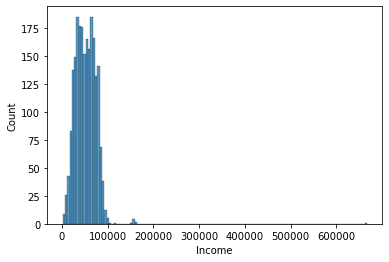

In [6]:
# Plot this feature to identify best strategy for imputation
sns.histplot(df.Income)

**Notes**

*Most incomes are distributed between $0-\$100,000, with a few outliers*
*Will impute null values with median value, to avoid effects of outliers on imputation value*


<AxesSubplot:>

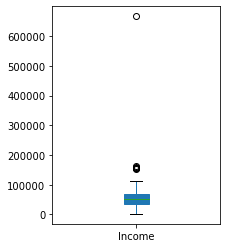

In [7]:
# Plot Income feature outliers
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [8]:
# Impute null values in Income, using median value (to avoid skewing of the mean due to outliers)
df['Income'] = df['Income'].fillna(df['Income'].median())

**Are there any duplicated instances?**

In [9]:
df.duplicated().sum()

182

**Are there any abnormal value in categorical features?**

In [12]:
ctg = ['Education','Marital_Status','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']

In [14]:
for i in ctg:
    print(df[i].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
56    37
30    32
54    32
46    31
49    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64
0    2077
1     163
Name: AcceptedCmp3, dtype: int64
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
0    2077
1     163
Name: AcceptedCmp5, dtype: int64
0    2096
1     144
Name: AcceptedCmp1, dtype: int64
0    2210
1      30
Name: AcceptedCmp2, dtype: int64
0    2219
1      21
Name: Complain, dtype: int64
0    1906
1     334
Name: Response, dtype: int64


This doesn't look right... We'll have to find some information about different education levels and then maybe make some assumptions about marital statuses.

**Are there any outliers?**

Year_Birth                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Income                 AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Kidhome                 AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Teenhome               AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recency                AxesSubplot(0.766379,0.749828;0.133621x0.130172)
MntWines                  AxesSubplot(0.125,0.593621;0.133621x0.130172)
MntFruits              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MntMeatProducts         AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MntFishProducts        AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MntSweetProducts       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MntGoldProds              AxesSubplot(0.125,0.437414;0.133621x0.130172)
NumDealsPurchases      AxesSubplot(0.285345,0.437414;0.133621x0.130172)
NumWebPurchases         AxesSubplot(0.44569,0.437414;0.133621x0.130172)
NumCatalogPurchases    AxesSubplot(0.606034,0.437414;0.133621x0.

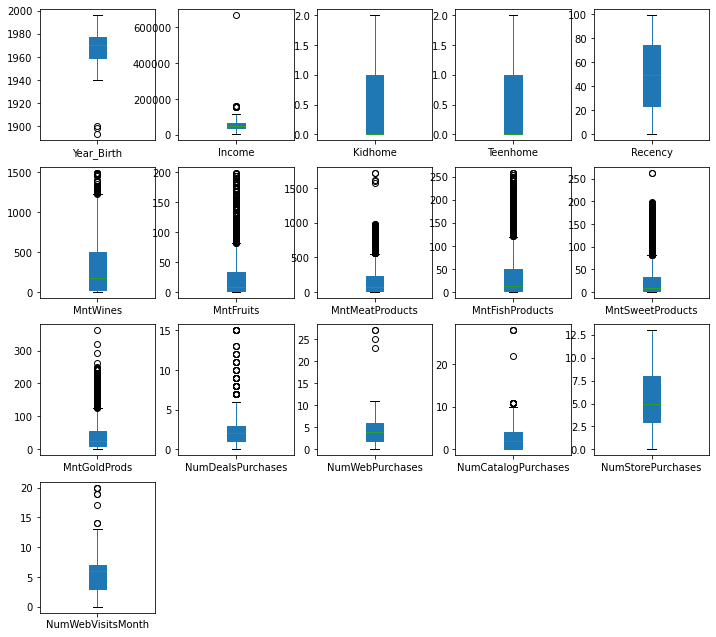

In [38]:
# select columns to plot
df_to_plot = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)

**Notes:**

Multiple features contain outliers (see boxplots below), but the only that likely indicate data entry errors are Year_Birth <= 1900


**We retrieve all cleaned data set instances to continue analysis cause lack of timing.**

In [3]:
df_cleaned = pd.read_csv('../data/data_cleaned.csv')

In [42]:
df_cleaned

,ID,Kidhome,Teenhome,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,Year_Birth_y,Income_y,Recency_y,MntWines_y,MntFruits_y,MntMeatProducts_y,MntFishProducts_y,MntSweetProducts_y,MntGoldProds_y,NumDealsPurchases_y,NumWebPurchases_y,NumCatalogPurchases_y,NumStorePurchases_y,NumWebVisitsMonth_y,kmeans
0,5524,0,0,2012-04-09,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.303571,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.200000,0.296296,0.357143,0.307692,0.35,2
1,2174,1,1,2014-08-03,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.133333,0.037037,0.035714,0.153846,0.25,2
2,4141,0,0,2013-08-21,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.446429,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.066667,0.296296,0.071429,0.769231,0.20,0
3,6182,1,0,2014-10-02,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.785714,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.133333,0.074074,0.000000,0.307692,0.30,1
4,5324,1,0,2014-01-19,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.732143,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.333333,0.185185,0.107143,0.461538,0.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,8080,0,0,2012-08-17,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.821429,0.156137,0.505051,0.003349,0.005025,0.003478,0.011583,0.015267,0.009346,0.066667,0.000000,0.000000,0.230769,0.20,1
2004,10870,0,1,2013-06-13,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.482143,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,0.769470,0.133333,0.333333,0.107143,0.307692,0.25,2
2005,7270,0,0,2014-01-25,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.732143,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,0.074766,0.066667,0.074074,0.107143,1.000000,0.30,2
2006,8235,0,1,2014-01-24,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.285714,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114504,0.190031,0.133333,0.222222,0.178571,0.769231,0.15,0


In [4]:
df_cleaned = df_cleaned.drop(['ID', 'kmeans'], axis=1)

In [44]:
df_cleaned

,Kidhome,Teenhome,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,Year_Birth_y,Income_y,Recency_y,MntWines_y,MntFruits_y,MntMeatProducts_y,MntFishProducts_y,MntSweetProducts_y,MntGoldProds_y,NumDealsPurchases_y,NumWebPurchases_y,NumCatalogPurchases_y,NumStorePurchases_y,NumWebVisitsMonth_y
0,0,0,2012-04-09,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.303571,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.200000,0.296296,0.357143,0.307692,0.35
1,1,1,2014-08-03,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.133333,0.037037,0.035714,0.153846,0.25
2,0,0,2013-08-21,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.446429,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.066667,0.296296,0.071429,0.769231,0.20
3,1,0,2014-10-02,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.785714,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.133333,0.074074,0.000000,0.307692,0.30
4,1,0,2014-01-19,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.732143,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.333333,0.185185,0.107143,0.461538,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0,0,2012-08-17,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.821429,0.156137,0.505051,0.003349,0.005025,0.003478,0.011583,0.015267,0.009346,0.066667,0.000000,0.000000,0.230769,0.20
2004,0,1,2013-06-13,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.482143,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,0.769470,0.133333,0.333333,0.107143,0.307692,0.25
2005,0,0,2014-01-25,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.732143,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,0.074766,0.066667,0.074074,0.107143,1.000000,0.30
2006,0,1,2014-01-24,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.285714,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114504,0.190031,0.133333,0.222222,0.178571,0.769231,0.15


In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kidhome                2008 non-null   int64  
 1   Teenhome               2008 non-null   int64  
 2   Dt_Customer            2008 non-null   object 
 3   AcceptedCmp3           2008 non-null   int64  
 4   AcceptedCmp4           2008 non-null   int64  
 5   AcceptedCmp5           2008 non-null   int64  
 6   AcceptedCmp1           2008 non-null   int64  
 7   AcceptedCmp2           2008 non-null   int64  
 8   Complain               2008 non-null   int64  
 9   Response               2008 non-null   int64  
 10  2n Cycle               2008 non-null   float64
 11  Basic                  2008 non-null   float64
 12  Graduation             2008 non-null   float64
 13  Master                 2008 non-null   float64
 14  PhD                    2008 non-null   float64
 15  Divo

**Notes**

Categorical features encoded (dummy)
Quantitative features scaled
Dt customer hasn't been transformed in datetime type cause of inherent plotting issues

## Find patterns

To identify patterns, we will first identify feature correlations.
Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below.

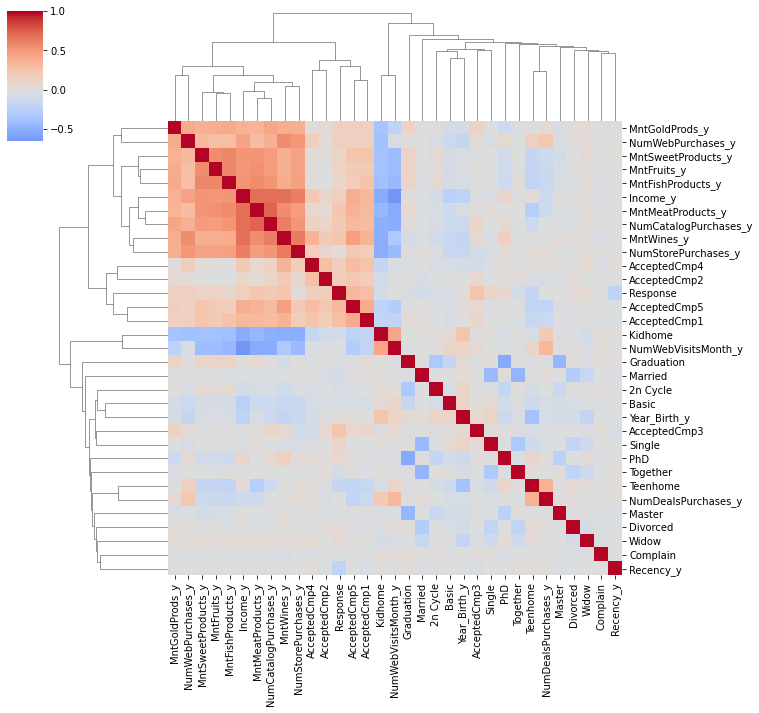

In [45]:
# calculate correlation matrix
## drop ctg features
corrs = df_cleaned.select_dtypes(include=np.number).corr()

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

Visualize correlation's pairs numerically

In [46]:
# Unstack correlation matrix
corr_df = corrs.unstack().reset_index()
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True)

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]
corr_df

,feature_1,feature_2,correlation
1014,NumCatalogPurchases_y,MntMeatProducts_y,0.735392
822,MntMeatProducts_y,NumCatalogPurchases_y,0.735392
690,Income_y,NumCatalogPurchases_y,0.690448
1010,NumCatalogPurchases_y,Income_y,0.690448
684,Income_y,MntMeatProducts_y,0.686588
...,...,...,...
824,MntMeatProducts_y,NumWebVisitsMonth_y,-0.527986
440,PhD,Graduation,-0.530079
376,Graduation,PhD,-0.530079
1076,NumWebVisitsMonth_y,Income_y,-0.645275


We can observe the following clusters of correlated features:

`"High Income"` cluster:
Amount spent and number of purchases are positively correlated with 'Income' as well as either purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases').

`"Have Kids & Teens"` cluster:
Amount spent and number of purchases are negatively correlated with (kids and/or teens).
Purchasing deals ('NumDealsPurchases') is positively correlated with (kids and/or teens) and negatively correlated with 'Income'.

`"Advertising Campaigns"` cluster:
Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other.
Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster.

Correlations:

NumWebVisitsMonth is positively correlated with 'Kidhome' and the number of deals purchased ('NumDealsPurchases'),suggesting that deals are an effective way of stimulating purchases on the website


# ML Modeling

## PCA

### Sorting PCs

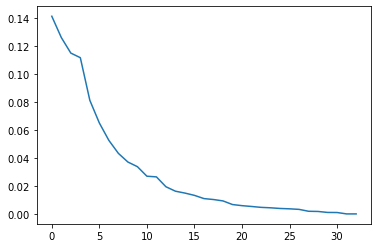

In [5]:
# drop datetime feature
df_cleaned = df_cleaned.drop('Dt_Customer', axis=1)

# defining pca
pca = PCA()
C = pca.fit(df_cleaned).transform(df_cleaned)

# sorting eigenvalues
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

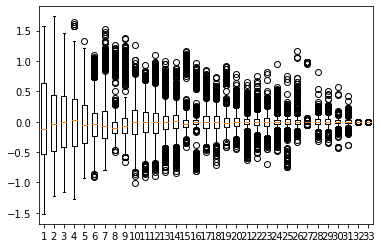

In [6]:
# PC Box plot
plt.figure()
plt.boxplot(C)
plt.show()

### Choose PCs

### Explained variance

In [7]:
# define covariance matrix
cov_mat= np.cov(df_cleaned, rowvar=False)
# define eigenvectors/eigenvalues from cov matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n Variance percentage of the first three principal components\n ",var_exp[0:10])
print("\n Total variance percentage of the first three principal components\n",sum(var_exp[0:10]))


 Variance percentage of the first three principal components
  [14.156386329150891, 12.632040674435924, 11.517951717412094, 11.187889128877883, 8.134070740808747, 6.512141540566943, 5.266714584324603, 4.33707983785504, 3.7162028814578294, 3.383267447494779]

 Total variance percentage of the first three principal components
 80.84374488238473


We'll choose 10 components.

In [8]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_cleaned)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [9]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.840046,-0.930194,-0.325536,-0.030927,0.712122,-0.012376,0.188003,-0.176493,0.081939,-0.166209
1,0.675475,-0.392863,0.125033,0.637392,0.880876,0.075399,-0.012036,-0.252698,-0.003680,-0.002080
2,-0.577619,-0.677461,-0.190070,0.454362,-0.710546,-0.107205,-0.290560,-0.073553,-0.048241,-0.267217
3,0.628743,-0.856368,-0.285645,0.347159,-0.675731,-0.231627,-0.029172,-0.100505,-0.051957,-0.202926
4,0.503237,0.382115,-0.070675,-0.998529,-0.141419,-0.599064,-0.335839,-0.018312,-0.333783,0.370120
...,...,...,...,...,...,...,...,...,...,...
2003,-0.138597,-0.874454,-0.208030,0.067529,0.632082,0.124391,-0.565928,-0.106447,-0.055188,-0.346498
2004,-0.455054,0.073878,1.072019,0.103870,0.025108,0.047718,-0.078054,-0.101657,0.080374,-0.067595
2005,-0.727770,-0.598842,0.069233,0.130790,-0.004060,-0.039649,-0.055067,0.956479,-0.470565,0.565645
2006,-0.405377,0.685952,-0.444148,0.667725,-0.615480,0.801191,0.102608,-0.210657,-0.083407,-0.315761


## Kmeans w/ PCA feature selection

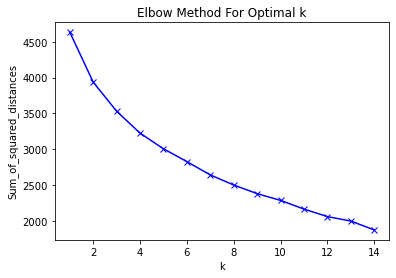

In [12]:
# plot Elbow chart to identify optimal k clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalDf)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
kl = KneeLocator(range(1, 15), Sum_of_squared_distances, curve="convex", direction="decreasing")
kl.elbow

5

As the elobow plot and KneeLocator returns, the optimal k for this data set including PCs is equal to 5.

In [29]:
# creates 5 clusters using k-means clustering method
k_cluster = KMeans(5, random_state=0)

# create new feature in which adding clustered instances
df_cleaned['clusters'] = k_cluster.fit_predict(principalDf) # create new feature in which adding clustered instances

In [32]:
# check clusters new feature join
df_cleaned

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,Year_Birth_y,Income_y,Recency_y,MntWines_y,MntFruits_y,MntMeatProducts_y,MntFishProducts_y,MntSweetProducts_y,MntGoldProds_y,NumDealsPurchases_y,NumWebPurchases_y,NumCatalogPurchases_y,NumStorePurchases_y,NumWebVisitsMonth_y,clusters
0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.303571,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.200000,0.296296,0.357143,0.307692,0.35,1
1,1,1,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.133333,0.037037,0.035714,0.153846,0.25,1
2,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.446429,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.066667,0.296296,0.071429,0.769231,0.20,4
3,1,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.785714,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.133333,0.074074,0.000000,0.307692,0.30,4
4,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.732143,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.333333,0.185185,0.107143,0.461538,0.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.821429,0.156137,0.505051,0.003349,0.005025,0.003478,0.011583,0.015267,0.009346,0.066667,0.000000,0.000000,0.230769,0.20,1
2004,0,1,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.482143,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.450382,0.769470,0.133333,0.333333,0.107143,0.307692,0.25,2
2005,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.732143,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045802,0.074766,0.066667,0.074074,0.107143,1.000000,0.30,2
2006,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.285714,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114504,0.190031,0.133333,0.222222,0.178571,0.769231,0.15,4


In [33]:
cluster_perc = df_cleaned.clusters.value_counts().reset_index(drop=True)/df_cleaned.shape[0] * 100
cluster_perc

0    23.754980
1    20.866534
2    19.322709
3    19.223108
4    16.832669
Name: clusters, dtype: float64

## Evaluate model performance

In [39]:
k_score = silhouette_score(principalDf, df_cleaned.clusters, metric='euclidean')
k_score

0.1783944731230407

**Which type of customers do these clusters contain?**

In [76]:
cluster_1 = df_cleaned[df_cleaned.clusters == 0]
cluster_2 = df_cleaned[df_cleaned.clusters == 1]
cluster_3 = df_cleaned[df_cleaned.clusters == 2]
cluster_4 = df_cleaned[df_cleaned.clusters == 3]
cluster_5 = df_cleaned[df_cleaned.clusters == 4]

<ipython-input-76-0cd111391429>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0], x=df_cleaned., y=df['Spending Score (1-100)'], hue=k_labels, palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=k_labels, palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender, y=df['Spending Score (1-100)'], hue=k_labels, palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,Year_Birth_y,Income_y,Recency_y,MntWines_y,MntFruits_y,MntMeatProducts_y,MntFishProducts_y,MntSweetProducts_y,MntGoldProds_y,NumDealsPurchases_y,NumWebPurchases_y,NumCatalogPurchases_y,NumStorePurchases_y,NumWebVisitsMonth_y,clusters
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.0,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.0
mean,1.082902,0.419689,0.082902,0.025907,0.010363,0.010363,0.0,0.012953,0.101036,0.111399,0.025907,0.564767,0.204663,0.093264,0.168394,0.772021,0.020725,0.007772,0.031088,0.594282,0.224035,0.484953,0.062836,0.041919,0.028562,0.042371,0.034114,0.067333,0.183420,0.102188,0.033031,0.293543,0.331606,0.0
std,0.276091,0.519766,0.276091,0.159063,0.101400,0.101400,0.0,0.113220,0.301768,0.315034,0.159063,0.496431,0.403979,0.291180,0.374701,0.420074,0.142648,0.087930,0.173781,0.161102,0.090931,0.292043,0.122036,0.093707,0.063673,0.083155,0.073046,0.090652,0.139846,0.075091,0.067145,0.159050,0.073315,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160714,0.004463,0.000000,0.000000,0.000000,0.000580,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.050000,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.517857,0.158368,0.242424,0.006028,0.005025,0.005217,0.007722,0.003817,0.015576,0.066667,0.037037,0.000000,0.230769,0.300000,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.589286,0.214179,0.479798,0.015740,0.015075,0.010435,0.015444,0.011450,0.037383,0.133333,0.074074,0.000000,0.230769,0.350000,0.0
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.696429,0.271979,0.765152,0.062458,0.035176,0.028841,0.046332,0.030534,0.077882,0.200000,0.111111,0.035714,0.307692,0.400000,0.0
max,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.928571,0.537553,1.000000,0.995311,0.798995,1.000000,0.691120,0.561069,0.595016,1.000000,0.407407,1.000000,1.000000,0.450000,0.0
